PISA Scores Mapping Visualization by Country

First I installed some packages for mapping.

In [ ]:
!pip install mapclassify

In [ ]:
!pip install pycountry

     |████████████████████████████████| 10.1 MB 14.6 MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=0d747d84ac4400dfe40f1cf04abea89ae3d16ba3dea5812d51c16772b6627a23
  Stored in directory: /root/.cache/pip/wheels/57/e8/3f/120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built pycountry


In [ ]:
!pip install geopandas

     |████████████████████████████████| 994 kB 12.1 MB/s 
     |████████████████████████████████| 15.4 MB 25 kB/s 
     |████████████████████████████████| 6.6 MB 57.8 MB/s 


Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import pycountry 
import matplotlib.pyplot as plt
import geopandas
from geopandas import GeoDataFrame
import mapclassify

I found a file that contains latitude and longitude values of countries. Then I converted it to csv.

In [ ]:
data = pd.read_csv('/content/pisa_data_2.csv')

In [ ]:
coordination_file = pd.read_csv (r'/content/latitude-longtitude.txt')
coordination_file.to_csv(r'/content/coordination.csv', index = None)

Then I used the geopandas dataset that contains the necessary features for mapping.

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [ ]:
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']

In [ ]:
coord_data = pd.read_csv('/content/coordination.csv')

In [ ]:
coord_data.head()

,Country,latitude,longitude
0,Afghanistan,33.939110,67.709953
1,Albania,41.153332,20.168331
2,Algeria,28.033886,1.659626
3,Angola,-11.202692,17.873887
4,Argentina,-38.416097,-63.616672


First I merged the world data with left join.

In [ ]:
data = data.merge(world,left_on = 'CNT' ,right_on='CODE', how='left')

Then I merged the coordination data with left join.

In [ ]:
data = data.merge(coord_data, on = 'Country', how = 'left')

In [ ]:
data = GeoDataFrame(data)

I created a subset to look at the NaN values ​​and which countries.

In [ ]:
sub = data.groupby(['Country'])['latitude','longitude'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
sub[sub['latitude'].isna() == True]

,latitude,longitude
Country,,
Hong Kong,NaN,NaN
Kosovo,NaN,NaN
Macao,NaN,NaN
"Macedonia, the former Yugoslav Republic of",NaN,NaN
Moscow Region(RUS),NaN,NaN
Singapore,NaN,NaN
Tatarstan(RUS),NaN,NaN


In [ ]:
data['Country'][data['CODE'].isna() == True].value_counts()

B-S-J-Z (China)       361
France                252
Norway                251
Tatarstan(RUS)        239
Kosovo                211
Baku(Azerbaijan)      197
Chinese Taipei        192
Singapore             166
Hong Kong             152
Moscow Region(RUS)     61
Malta                  50
Macao                  45
Name: Country, dtype: int64

In [ ]:
sub = data[data['geometry'].isna() == False]

I gave the values of some missing latitude and longitude features.

In [ ]:
sub['latitude'][sub['Country'] == 'Macedonia, the former Yugoslav Republic of'] = 41.6086
sub['longitude'][sub['Country'] == 'Macedonia, the former Yugoslav Republic of'] = 21.7453

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Visualization

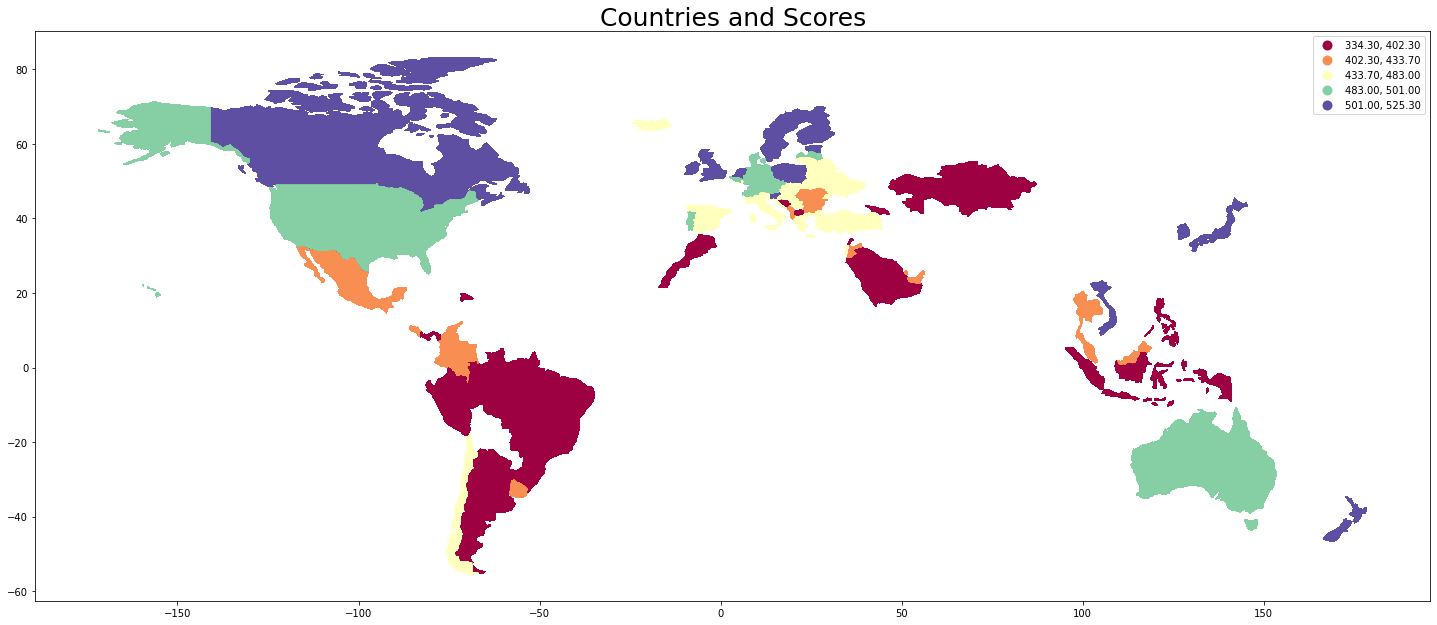

In [ ]:
sub.plot(column='Score',scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='Spectral',)
plt.title('Countries and Scores',fontsize=25)

plt.show()